In [1]:
!pip install -U diffusers==0.14.0 transformers==4.27.4 scipy==1.10.1 accelerate==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.2 MB/s eta 0:00:00


In [3]:
import torch
from diffusers import StableDiffusionPipeline

In [4]:
device = "cuda"
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, revision="fp16"
)
pipe = pipe.to(device)
pipe.enable_attention_slicing()

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

In [5]:
seed = 123
generator = torch.Generator(device).manual_seed(seed)

In [8]:
prompt = "future digital dinosaurs"

  0%|          | 0/50 [00:00<?, ?it/s]

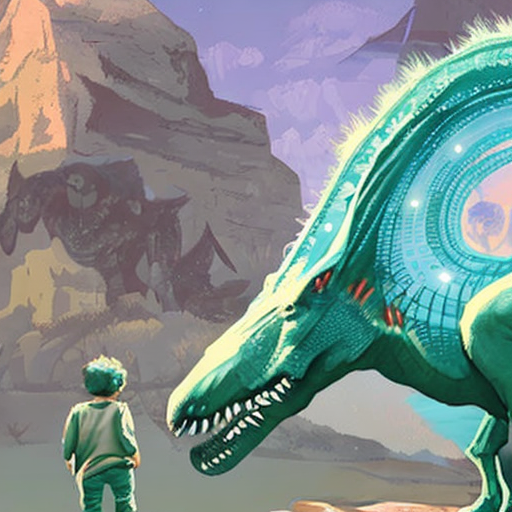

In [9]:
with torch.autocast(device):
    image = pipe(prompt, generator=generator).images[0]

image